In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
• question
# comment
'''

# Q1 - load data

### •	Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format

In [2]:
data=pd.read_json('transactions.txt',lines=True)

In [3]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


### •	Please describe the structure of the data. Number of records and fields in each record?

In [4]:
#structure of the data
print ('Data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
data.shape 

Data has 786363 rows and 29 columns


(786363, 29)

In [5]:
data.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

### •	Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [7]:
#missing data
data2=data.replace('', np.NaN)
data2.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [8]:
# min and max
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [9]:
#unique value
bool_value = [var for var in data.columns if data[var].dtype=='bool']
discrete = [var for var in data.columns if data[var].dtype!='O' and data[var].dtype!='bool' and data[var].nunique()<15]
continous = [var for var in data.columns if data[var].dtype!='O' and var not in discrete and var not in bool_value]
categorical = [var for var in data.columns if data[var].dtype=='O']

print (f'There are {len(bool_value)} bool_value')
print (f'There are {len(discrete)} discrete variables')
print (f'There are {len(continous)} continous variables')
print (f'There are {len(categorical)} categorical variables')

There are 3 bool_value
There are 1 discrete variables
There are 8 continous variables
There are 17 categorical variables


In [10]:
data[discrete].nunique()

creditLimit    10
dtype: int64

In [11]:
data[categorical].nunique()

transactionDateTime        776637
merchantName                 2490
acqCountry                      5
merchantCountryCode             5
posEntryMode                    6
posConditionCode                4
merchantCategoryCode           19
currentExpDate                165
accountOpenDate              1820
dateOfLastAddressChange      2184
transactionType                 4
echoBuffer                      1
merchantCity                    1
merchantState                   1
merchantZip                     1
posOnPremises                   1
recurringAuthInd                1
dtype: int64

In [12]:
col=['creditLimit','acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType','merchantCategoryCode']
for i in col:
    print(i,data[i].unique())

creditLimit [ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]
acqCountry ['US' '' 'CAN' 'MEX' 'PR']
merchantCountryCode ['US' 'CAN' '' 'PR' 'MEX']
posEntryMode ['02' '09' '05' '80' '90' '']
posConditionCode ['01' '08' '99' '']
transactionType ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' '']
merchantCategoryCode ['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']


# Q2 - Plot

### •	Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

Text(0.5, 1.0, 'transactionAmount')

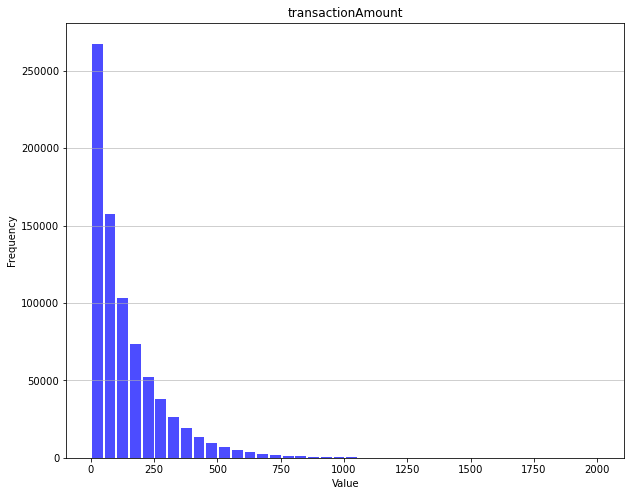

In [13]:
fig,ax=plt.subplots(figsize=(10,8))
n, bins, patches = plt.hist(x=data['transactionAmount'], bins=40, color='b', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('transactionAmount')

### •	Report any structure you find and any hypotheses you have about that structure.
### # too many outliers in transactionAmount

C:\Users\xxw180021\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transactionAmount'>

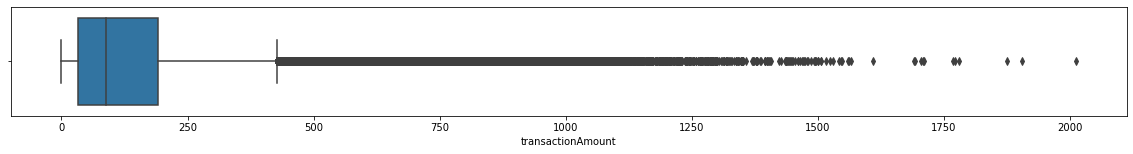

In [14]:
plt.figure(figsize=[20,2])
sns.boxplot(data['transactionAmount'])

### # As we can see, 99% of the data is smaller than 675.63. Distribution of transactionAmount is highly Right-skewed
### # Hypothesis: most of the processed amounts of each transaction are within 675.63

In [15]:
data['transactionAmount'].quantile([.01, .05, .1, .5, .9, .95, .99, 1])

0.01       0.0000
0.05       3.4400
0.10       8.9000
0.50      87.9000
0.90     329.4200
0.95     433.3500
0.99     675.6304
1.00    2011.5400
Name: transactionAmount, dtype: float64

### # Box plot of transactionAmount with & without outliers (5%)

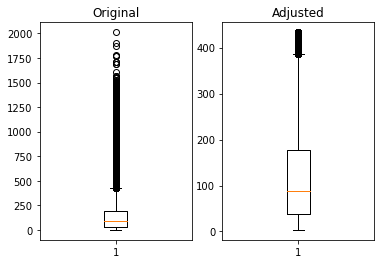

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

pd_series = data['transactionAmount']
pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.05), pd_series.quantile(.95))] 

ax1.boxplot(pd_series)
ax1.set_title('Original')

ax2.boxplot(pd_series_adjusted)
ax2.set_title('Adjusted')

plt.show()

### # Plot histogram of transactionAmount with & without outliers (5%)

(array([84043., 66321., 61931., 57376., 47603., 40507., 35701., 32349.,
        29666., 26562., 24176., 21926., 19999., 18158., 16393., 14991.,
        13410., 12404., 11312., 10272.,  9324.,  8326.,  7471.,  6984.,
         6510.,  5743.,  5199.,  4790.,  4335.,  3966.]),
 array([  3.44      ,  17.77033333,  32.10066667,  46.431     ,
         60.76133333,  75.09166667,  89.422     , 103.75233333,
        118.08266667, 132.413     , 146.74333333, 161.07366667,
        175.404     , 189.73433333, 204.06466667, 218.395     ,
        232.72533333, 247.05566667, 261.386     , 275.71633333,
        290.04666667, 304.377     , 318.70733333, 333.03766667,
        347.368     , 361.69833333, 376.02866667, 390.359     ,
        404.68933333, 419.01966667, 433.35      ]),
 <BarContainer object of 30 artists>)

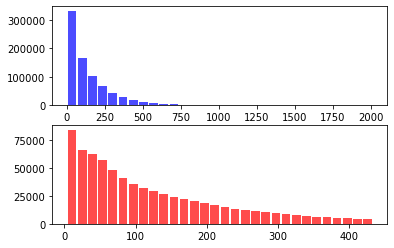

In [17]:
fig, axs = plt.subplots(2)

axs[0].hist(pd_series, bins=30, color='b',alpha=0.7, rwidth=0.85)

axs[1].hist(pd_series_adjusted, bins=30,color='r',alpha=0.7, rwidth=0.85)

# Q3 - Data Wrangling - Duplicate Transactions

### •	Can you programmatically identify reversed and multi-swipe transactions?

In [18]:
data['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', ''], dtype=object)

### # reversed transactions

In [19]:
tran_reverse=data[data['transactionType']=='REVERSAL']
tran_reverse

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,,299.02,,,,True,,,False,False
73,574788567,574788567,2500,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,...,,67.28,,,,True,,,False,False
101,924729945,924729945,50000,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,...,,168.57,,,,False,,,False,False
133,984504651,984504651,50000,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,...,,3632.59,,,,False,,,False,False
156,984504651,984504651,50000,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,...,,8090.70,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786106,899818521,899818521,2500,968.33,2016-09-29T02:04:32,10.05,cheapfast.com,US,US,02,...,,1531.67,,,,False,,,False,False
786120,638498773,638498773,10000,9798.21,2016-01-01T19:48:03,201.79,KFC #928167,US,US,05,...,,201.79,,,,True,,,False,False
786219,638498773,638498773,10000,5331.33,2016-11-03T04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,...,,4668.67,,,,True,,,False,False
786225,638498773,638498773,10000,4393.10,2016-11-06T22:54:25,49.39,Shake Shack #118502,US,US,05,...,,5606.90,,,,True,,,False,False


### # multi-swipe transactions

In [20]:
data['transactionDate']=data['transactionDateTime'].str.split('T', expand=True)[0]
data['transactionTime']=data['transactionDateTime'].str.split('T', expand=True)[1]
data['transactionTime_hour']=data['transactionTime'].str.split(':',expand=True)[0]
data['transactionTime_min']=data['transactionTime'].str.split(':',expand=True)[1]
data['transactionTime_second']=data['transactionTime'].str.split(':',expand=True)[2]

In [21]:
data['count']=1
data4=data.groupby(['customerId','accountNumber','transactionDate','merchantName','transactionTime_hour','transactionTime_min','transactionAmount'])['count'].sum().reset_index()
multi_swipe=data4[data4['count']>1]
multi_swipe

,customerId,accountNumber,transactionDate,merchantName,transactionTime_hour,transactionTime_min,transactionAmount,count
55,100088067,100088067,2016-10-16,Fresh Flowers,18,01,411.35,2
231,100737756,100737756,2016-01-18,Franks Deli,01,55,693.50,2
446,101132326,101132326,2016-08-24,Regal Cinemas #05791,02,09,188.86,2
2108,102755773,102755773,2016-10-22,McDonalds #892016,15,51,38.59,2
2121,102755773,102755773,2016-10-31,staples.com,15,09,98.58,2
...,...,...,...,...,...,...,...,...
783030,998801944,998801944,2016-10-12,Subway #671015,04,11,551.11,2
783322,999086814,999086814,2016-05-07,Lyft,17,56,49.44,2
783598,999086814,999086814,2016-10-09,Lyft,21,49,92.17,2
783862,999257059,999257059,2016-08-09,Washington Times,11,25,557.11,2


### •	What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

### # reversed transactions: total number of transactions is 20303, total dollar amount is 2821792.5

In [22]:
len(tran_reverse)

20303

In [23]:
tran_reverse['transactionAmount'].sum()

2821792.5

### # multi-swipe transactions: total number of transactions is 2195, total dollar amount is 324844.44

### # for the multi-swipe transactions, my code can only find the multi-swipe transcation if they are in the same minute. I noticed there are some multi-swipe transactions distributed within two or three minutes. So the correct total number of multi-swipe transactions should be higher.

In [24]:
len(multi_swipe)

2195

In [25]:
multi_swipe['count'].unique()

array([2, 3], dtype=int64)

In [26]:
swipe_2=multi_swipe['transactionAmount'].where(multi_swipe['count']==2).sum()
swipe_3=multi_swipe['transactionAmount'].where(multi_swipe['count']==3).sum()
swipe_2+swipe_3*2

324844.44

### •	Did you find anything interesting about either kind of transaction?

### # reversed transactions: some of the reversed transations are followed by purchase transactions of the same amount, but some of them are not; Online retail and fastfood have highest reversed transactions than other merchantCategory
### # multi-swipe transactions: most of them swipe twice; Uber and Lyft have the highest multi-swipe transactions. Online retail is the highest multi-swipe transaction merchantCategory

# Q4 - Model

### •	Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

### # machine learning model (XGBoost+RandomUnderSampler)

In [27]:
#this is an imblanced dataset
data2['isFraud2']=np.where(data['isFraud']==True,1,0) 
data2['isFraud2'].value_counts() 

0    773946
1     12417
Name: isFraud2, dtype: int64

In [28]:
#drop column which don't have data
data2.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises',
           'recurringAuthInd'],axis=1,inplace=True)

In [29]:
data2.drop(['transactionDateTime','currentExpDate','accountOpenDate','accountNumber','enteredCVV','dateOfLastAddressChange'],axis=1,inplace=True)

In [30]:
#distribution
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [31]:
categorical = [var for var in data2.columns if data2[var].dtype=='O']
continuous = [var for var in data2.columns if data2[var].dtype=='int64'or data2[var].dtype=='float64']
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(continuous)} continuous variables')

There are 7 categorical variables
There are 7 continuous variables


C:\Users\xxw180021\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


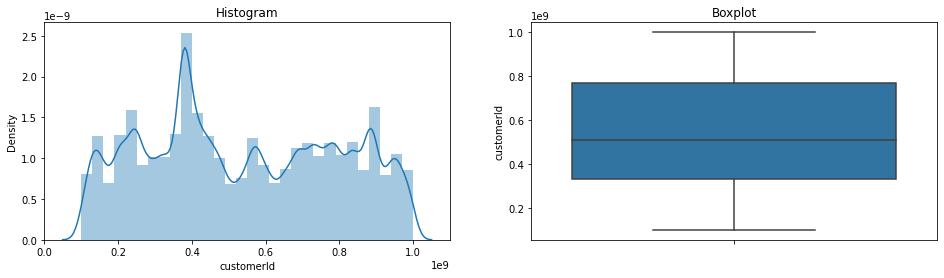

C:\Users\xxw180021\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


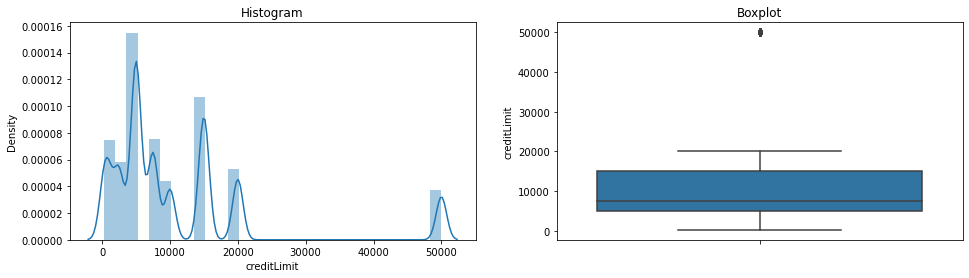

C:\Users\xxw180021\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


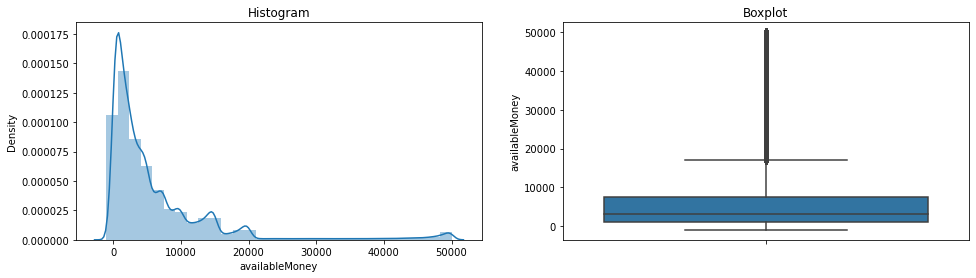

C:\Users\xxw180021\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


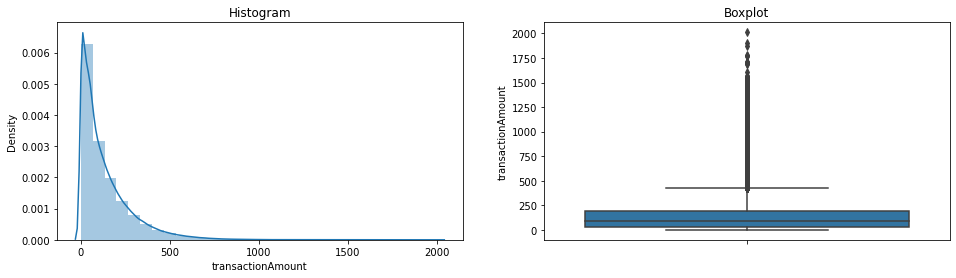

C:\Users\xxw180021\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


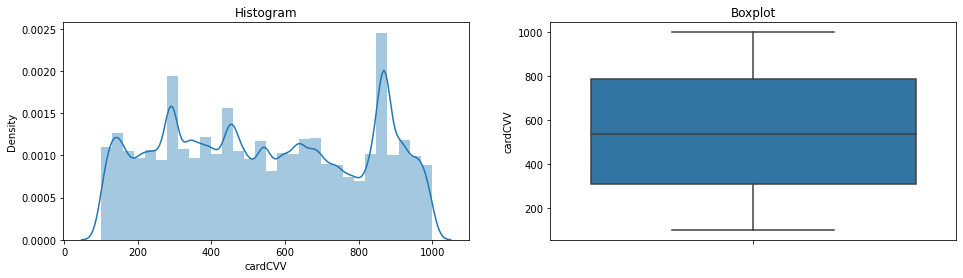

C:\Users\xxw180021\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


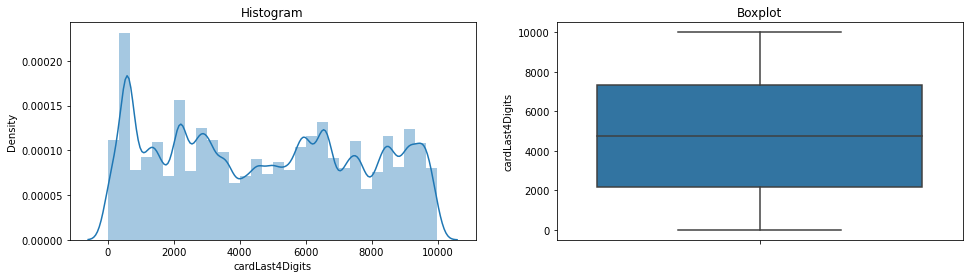

C:\Users\xxw180021\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


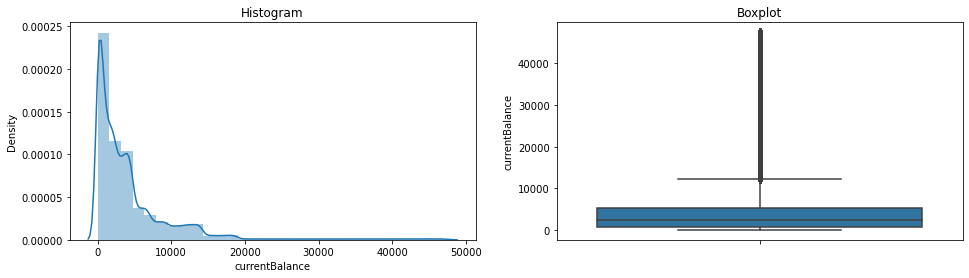

In [32]:
for var in continuous:
    diagnostic_plots(data, var)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine import categorical_encoders as ce
from feature_engine import missing_data_imputers as mdi
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from imblearn.pipeline import Pipeline as Pipeline_imb
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#split dataset into two part: train and test
X_train, X_test, y_train, y_test = train_test_split(data2.drop(['isFraud','isFraud2'], axis=1),
                                                   data2['isFraud2'],
                                                   test_size=0.2,
                                                   random_state=0)
X_train.shape, X_test.shape

((629090, 16), (157273, 16))

In [52]:
data_pipeline = Pipeline([
    
    #missing data imputation
    ('imputer_cat_freq', 
     mdi.FrequentCategoryImputer(variables=['acqCountry','merchantCountryCode','posEntryMode','posConditionCode'])),
    
    #categorial encoding
    ('categorical', ce.OneHotCategoricalEncoder(variables =['acqCountry','merchantCountryCode','posEntryMode',
                                                            'posConditionCode','merchantCategoryCode','transactionType'])),
    ('categorical2', ce.CountFrequencyCategoricalEncoder(variables='merchantName')),
    
    # feature Scaling
    ('scale', MinMaxScaler()) 

])

In [53]:
data_pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['acqCountry',
                                                    'merchantCountryCode',
                                                    'posEntryMode',
                                                    'posConditionCode'])),
                ('categorical',
                 OneHotCategoricalEncoder(variables=['acqCountry',
                                                     'merchantCountryCode',
                                                     'posEntryMode',
                                                     'posConditionCode',
                                                     'merchantCategoryCode',
                                                     'transactionType'])),
                ('categorical2',
                 CountFrequencyCategoricalEncoder(variables=['merchantName'])),
                ('scale', MinMaxScaler())])

In [54]:
X_train=data_pipeline.transform(X_train)
X_test=data_pipeline.transform(X_test)

### xgboost + under sampling

In [55]:
pipe_roc_xgb = Pipeline_imb([('under',RandomUnderSampler(sampling_strategy=0.5)),
                             ('xgb',XGBClassifier(random_state=42,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 5,
                                                                            booster='dart'
                                                                             ))])
param_xgb = {'xgb__learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
             }

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_xgb, cv=5, n_jobs=2,scoring = 'roc_auc')
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(ogrid_xgb.best_score_))

C:\Users\xxw180021\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters: {'xgb__learning_rate': 0.4}
Best Mean cross-validation score: 0.82169


### •	Provide an estimate of performance using an appropriate sample and show your work.

In [56]:
# let's get the predictions
print(f'Train score is {ogrid_xgb.score(X_train,y_train)}')
print(f'test score is {ogrid_xgb.score(X_test,y_test)}')
print('===========================')
print('test_ROC AUC proba_score:',roc_auc_score(y_test==1,ogrid_xgb.predict_proba(X_test)[:,1]))
print('test_ROC AUC score:', roc_auc_score(y_test, X_test_preds))
print('test_Accuracy', accuracy_score(y_test, X_test_preds))
print('===========================')
X_test_preds = ogrid_xgb.predict(X_test)
confusion = metrics.confusion_matrix(y_test, X_test_preds)
print(f"Confusion matrix:\n{confusion}")

Train score is 0.8769689180559348
test score is 0.8268938267191913
test_ROC AUC proba_score: 0.8268938267191913
test_ROC AUC score: 0.7216900171619173
test_Accuracy 0.8727690067589479
Confusion matrix:
[[135567  19274]
 [  1077   1355]]


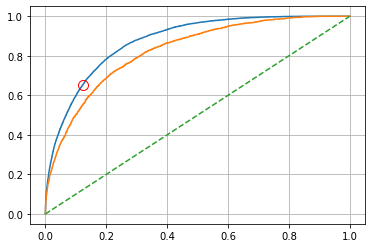

In [57]:
# roc_acu curve
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

fpr, recall, threshold = roc_curve(y_train, ogrid_xgb.predict_proba(X_train)[:,1])
plt.subplots()
plt.plot(fpr, recall)

zero_index = np.argmin(np.abs(threshold-0.5))
plt.plot(fpr[zero_index], recall[zero_index], c = 'red', label = 'Default threshold', 
         fillstyle = 'none', markersize = 10, marker = 'o')


fpr2, recall2, threshold2 = roc_curve(y_test, ogrid_xgb.predict_proba(X_test)[:,1])
plt.plot(fpr2, recall2)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')


plt.grid()

### •	Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

### # For the model: I have built a pipeline to combined Xgboost and RandomUnderSampler since there is an imbalanced dataset.
### # Feature of transactionAmount is useful.
### # I have tried to extract some information from date and time and put into the model, but the result didn't improve. So I didn't put the date and time information into the model. But I think the date and time may helpful. If I have more time, I will try to extract more features from date and time and spend more time to do feature selection.
### # I will spend more time on data pre-processing, parameter tuning in XGBosot , try to change the threshold for ROC Curve and try more resampling and ensemble techniques to compare the results and figure out the best one.
### # I will spend more time on business analytics, assumptions and have statistical & visualization to test the ideas and figure out more business insights.

<AxesSubplot:>

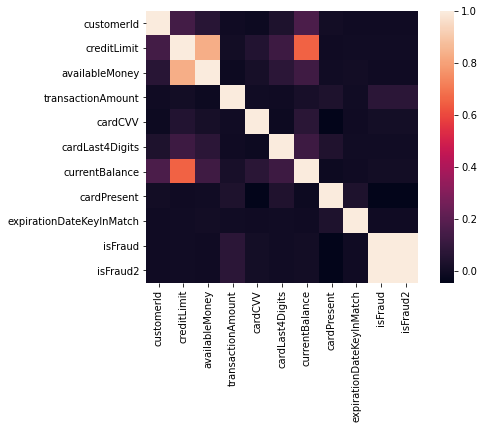

In [58]:
#correlation
f, ax = plt.subplots(figsize=(8, 5))
corr = data2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),  square=True, ax=ax)

Feature: 0, Score: 0.09416
Feature: 1, Score: 0.01324
Feature: 2, Score: 0.17362
Feature: 3, Score: 0.21779
Feature: 4, Score: 0.12262
Feature: 5, Score: 0.06778
Feature: 6, Score: 0.07440
Feature: 7, Score: 0.16503
Feature: 8, Score: 0.00421
Feature: 9, Score: 0.00015
Feature: 10, Score: 0.00044
Feature: 11, Score: 0.00063
Feature: 12, Score: 0.00043
Feature: 13, Score: 0.00041
Feature: 14, Score: 0.00069
Feature: 15, Score: 0.00066
Feature: 16, Score: 0.00059
Feature: 17, Score: 0.00015
Feature: 18, Score: 0.00602
Feature: 19, Score: 0.00626
Feature: 20, Score: 0.00689
Feature: 21, Score: 0.00367
Feature: 22, Score: 0.00324
Feature: 23, Score: 0.00714
Feature: 24, Score: 0.00698
Feature: 25, Score: 0.00176
Feature: 26, Score: 0.00091
Feature: 27, Score: 0.00196
Feature: 28, Score: 0.00399
Feature: 29, Score: 0.00035
Feature: 30, Score: 0.00009
Feature: 31, Score: 0.00035
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00118
Feature: 34, Score: 0.00079
Feature: 35, Score: 0.00049
Fe

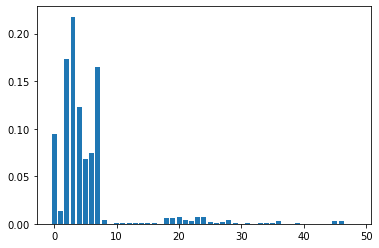

In [59]:
# decision tree for feature importance on a classification problem
# code source"https://machinelearningmastery.com/calculate-feature-importance-with-python/"
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()